In [1]:
labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax' ]
base_dir = '/media/ente/M2/2018 - 11 - sorted data'
export_dir= '/home/ente/Dropbox/THESIS/Code/Transfer_InceptionV3/Export'

#preprocessing
color_mode = 'rgb'
color_channels = 3
#color_mode='grayscale'
validation_split = 0.2
rescale = 224
target_size = (rescale, rescale)
input_shape = (rescale, rescale, color_channels)

#layers + optimizer
dropout = 0.5
batch_size = 16
epochs1 = 15
epochs2 = 25
epochs3 = 10
dense_units = 1024
class_mode = 'categorical'
import keras_metrics
metrics= ['categorical_accuracy', keras_metrics.precision(), keras_metrics.recall()]

#class dirs
import os
ate_dir = os.path.join(base_dir, labels[0])
car_dir = os.path.join(base_dir, labels[1])
con_dir = os.path.join(base_dir, labels[2])
ede_dir = os.path.join(base_dir, labels[3])
eff_dir = os.path.join(base_dir, labels[4])
emp_dir = os.path.join(base_dir, labels[5])
fib_dir = os.path.join(base_dir, labels[6])
her_dir = os.path.join(base_dir, labels[7])
inf_dir = os.path.join(base_dir, labels[8])
mas_dir = os.path.join(base_dir, labels[9])
nof_dir = os.path.join(base_dir, labels[10])
nod_dir = os.path.join(base_dir, labels[11])
ple_dir = os.path.join(base_dir, labels[12])
pne_dir = os.path.join(base_dir, labels[13])
pn2_dir = os.path.join(base_dir, labels[14])
#filenames
ate_fnames = os.listdir(ate_dir)
car_fnames = os.listdir(car_dir)
con_fnames = os.listdir(con_dir)
ede_fnames = os.listdir(ede_dir)
eff_fnames = os.listdir(eff_dir)
emp_fnames = os.listdir(emp_dir)
fib_fnames = os.listdir(fib_dir)
her_fnames = os.listdir(her_dir)
inf_fnames = os.listdir(inf_dir)
mas_fnames = os.listdir(mas_dir)
nof_fnames = os.listdir(nof_dir)
nod_fnames = os.listdir(nod_dir)
ple_fnames = os.listdir(ple_dir)
pne_fnames = os.listdir(pne_dir)
pn2_fnames = os.listdir(pn2_dir)
#print (train_ate_fnames[:10])
#train_car_fnames.sort()

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
    rescale=1./255,
    #rescale=((1./255)-.5)*2,
    samplewise_center=True,
    samplewise_std_normalization=True,
    validation_split=validation_split) # set validation split

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode=color_mode, 
    #classes=intTransformedLabels,
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    #early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=3, verbose=1, mode='auto'),
    class_mode=class_mode, #Determines the type of label arrays that are returned:"categorical" will be 2D one-hot encoded labels,
    color_mode=color_mode,
    #classes=intTransformedLabels,
    subset='validation') # set as validation data
print(validation_generator.class_indices)
print(validation_generator.classes)

print ('total Atelectasis images:       ', len(os.listdir(ate_dir))) 
print ('total Cardiomegaly images:      ', len(os.listdir(car_dir))) 
print ('total Consolidation images:     ', len(os.listdir(con_dir))) 
print ('total Edema images:             ', len(os.listdir(ede_dir))) 
print ('total Effusion images:          ', len(os.listdir(eff_dir))) 
print ('total Emphysema images:         ', len(os.listdir(emp_dir))) 
print ('total Fibrosis images:          ', len(os.listdir(fib_dir))) 
print ('total Hernia images:            ', len(os.listdir(her_dir))) 
print ('total Infiltration images:      ', len(os.listdir(inf_dir))) 
print ('total Mass images:              ', len(os.listdir(mas_dir))) 
print ('total No_Finding images:        ', len(os.listdir(nof_dir))) 
print ('total Nodule images:            ', len(os.listdir(nod_dir))) 
print ('total Pleural_Thickening images:', len(os.listdir(ple_dir))) 
print ('total Pneumonia images:         ', len(os.listdir(pne_dir))) 
print ('total Pneumothorax images:      ', len(os.listdir(pn2_dir))) 

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
from keras import applications
from keras.optimizers import SGD

# build the VGG16 network
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape = input_shape)
x = base_model.output
x = Flatten(input_shape=base_model.output_shape[1:])(x)
x = Dense(dense_units, activation='relu')(x)
x = Dropout(dropout)(x)
x = Dense(dense_units, activation='relu')(x)
x = Dropout(dropout)(x)
# and a logistic layer -- we have 15 classes
predictions = Dense(len(labels), activation = 'softmax') (x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were imagenet initialized)
for layer in base_model.layers:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=1e-4, momentum=0.9),metrics=metrics)
model.summary()

Using TensorFlow backend.


Found 34283 images belonging to 15 classes.
Found 8564 images belonging to 15 classes.
{'Atelectasis': 0, 'Cardiomegaly': 1, 'Consolidation': 2, 'Edema': 3, 'Effusion': 4, 'Emphysema': 5, 'Fibrosis': 6, 'Hernia': 7, 'Infiltration': 8, 'Mass': 9, 'No Finding': 10, 'Nodule': 11, 'Pleural_Thickening': 12, 'Pneumonia': 13, 'Pneumothorax': 14}
[ 0  0  0 ... 14 14 14]
total Atelectasis images:        2015
total Cardiomegaly images:       464
total Consolidation images:      633
total Edema images:              310
total Effusion images:           1804
total Emphysema images:          461
total Fibrosis images:           366
total Hernia images:             53
total Infiltration images:       4640
total Mass images:               1043
total No_Finding images:         28000
total Nodule images:             1273
total Pleural_Thickening images: 525
total Pneumonia images:          161
total Pneumothorax images:       1099
_________________________________________________________________
Layer (

In [2]:
history1=model.fit_generator(    
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    class_weight = 'balanced',
    epochs = epochs1)

Epoch 1/15
2142/2142 [==============================] - 629s 294ms/step - loss: 1.4828 - categorical_accuracy: 0.6485 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3650 - val_categorical_accuracy: 0.6539 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
2142/2142 [==============================] - 618s 288ms/step - loss: 1.4161 - categorical_accuracy: 0.6533 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3650 - val_categorical_accuracy: 0.6538 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
2142/2142 [==============================] - 613s 286ms/step - loss: 1.4012 - categorical_accuracy: 0.6531 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3556 - val_categorical_accuracy: 0.6538 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
2142/2142 [==============================] - 614s 287ms/step - loss: 1.3851 - categorical_accuracy: 0.6533 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3664 - val_ca

In [3]:
from matplotlib import pyplot

pyplot.plot(history1.history['categorical_accuracy'])
pyplot.plot(history1.history['val_categorical_accuracy'])
pyplot.title('Training and validation accuracy')
pyplot.show()

pyplot.plot(history1.history['loss'])
pyplot.plot(history1.history['val_loss'])
pyplot.title('Training and validation loss')
pyplot.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [4]:
#Confution Matrix and Classification Report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(validation_generator, validation_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=labels))

Confusion Matrix
[[   0    0    0    0    0    0    0    0    3    0  400    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0   92    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0  126    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0   62    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    1    0  359    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0   92    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    2    0   71    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0   10    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    3    0  925    0    0    0
     0]
 [   0    0    0    0    1    0    0    0    0    0  207    0    0    0
     0]
 [   0    0    0    0    3    0    0    0   25    0 5572    0    0    0
     0]
 [   0    0    0    0    1    0    0    0    2    0  251    0    0    0
     0]
 [   0    0    0    0  

/home/ente/anaconda3/envs/TF/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Export Model + Weights

Run the following cell to export results to disk.

import h5py
model.save_weights(export_dir + 'my_model_weights#2.h5')

# save as JSON
json_string = model.to_json()

# save as YAML
yaml_string = model.to_yaml()

In [5]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the first convolution blocks, i.e. we will freeze
# the first 24 layers and unfreeze the rest:
for layer in model.layers[:11]:
   layer.trainable = False
for layer in model.layers[11:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
#metrics= ['categorical_accuracy']
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     7

In [6]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history2=model.fit_generator(    
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    class_weight = 'balanced',
    epochs = epochs2)

Epoch 1/25
2142/2142 [==============================] - 616s 288ms/step - loss: 1.3066 - categorical_accuracy: 0.6536 - val_loss: 1.3334 - val_categorical_accuracy: 0.6549
Epoch 2/25
2142/2142 [==============================] - 613s 286ms/step - loss: 1.2797 - categorical_accuracy: 0.6536 - val_loss: 1.3482 - val_categorical_accuracy: 0.6536
Epoch 3/25
2142/2142 [==============================] - 613s 286ms/step - loss: 1.2552 - categorical_accuracy: 0.6539 - val_loss: 1.3599 - val_categorical_accuracy: 0.6552
Epoch 4/25
2142/2142 [==============================] - 613s 286ms/step - loss: 1.2358 - categorical_accuracy: 0.6550 - val_loss: 1.2942 - val_categorical_accuracy: 0.6531
Epoch 5/25
2142/2142 [==============================] - 613s 286ms/step - loss: 1.2169 - categorical_accuracy: 0.6541 - val_loss: 1.3073 - val_categorical_accuracy: 0.6501
Epoch 6/25
2142/2142 [==============================] - 613s 286ms/step - loss: 1.1919 - categorical_accuracy: 0.6567 - val_loss: 1.2899 - v

In [7]:
#Confution Matrix and Classification Report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(validation_generator, validation_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=labels))

Confusion Matrix
[[  10    2    3    0   21    2    0    0   22    0  335    2    0    0
     6]
 [   2    0    1    0    4    0    1    0    7    1   75    1    0    0
     0]
 [   1    1    1    0    9    1    0    0    6    1  104    2    0    0
     0]
 [   4    1    0    0    3    0    0    0    3    0   49    1    0    0
     1]
 [   6    0    0    1   19    0    3    0   16    0  310    2    0    0
     3]
 [   0    0    1    0    7    0    1    0    8    0   73    1    0    0
     1]
 [   3    1    0    0    3    0    1    0    6    1   55    1    1    0
     1]
 [   0    0    0    0    0    0    0    0    0    0    9    0    0    0
     1]
 [  22    2    5    1   57    3    2    0   60   10  748    7    0    0
    11]
 [   8    1    2    0   10    3    1    0   15    1  164    2    0    0
     1]
 [ 136   23   18    4  306   16   14    0  356   31 4576   57   10    0
    53]
 [   8    1    1    0   17    1    0    0   19    3  202    0    0    0
     2]
 [   2    2    0    0  

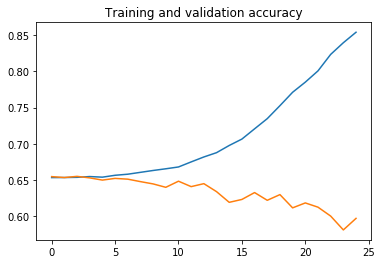

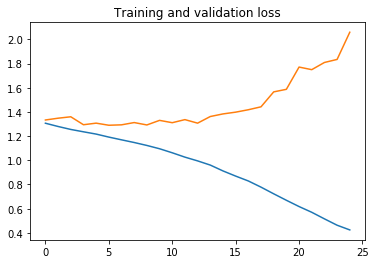

In [8]:
from matplotlib import pyplot

pyplot.plot(history2.history['categorical_accuracy'])
pyplot.plot(history2.history['val_categorical_accuracy'])
pyplot.title('Training and validation accuracy')
pyplot.show()

pyplot.plot(history2.history['loss'])
pyplot.plot(history2.history['val_loss'])
pyplot.title('Training and validation loss')
pyplot.show()

/home/ente/anaconda3/envs/TF/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


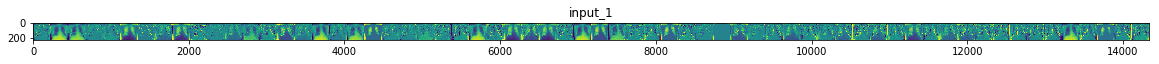

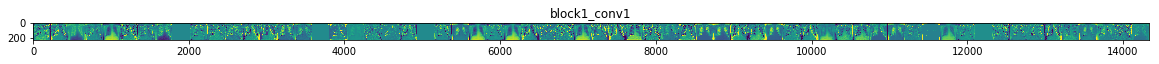

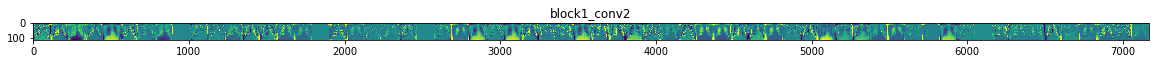

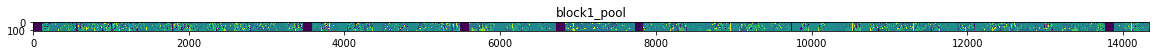

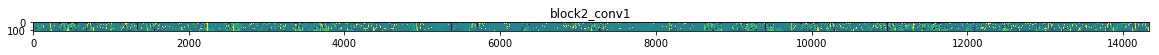

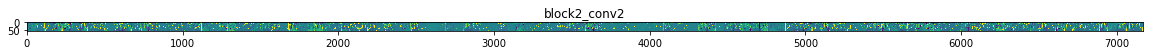

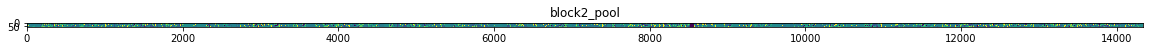

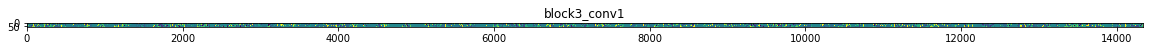

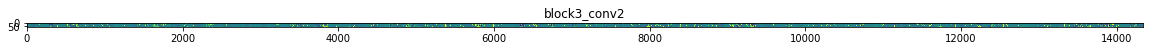

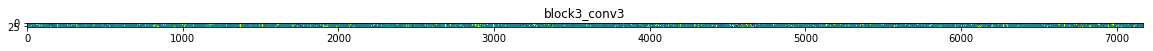

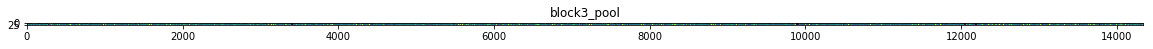

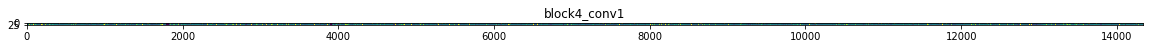

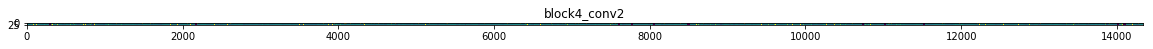

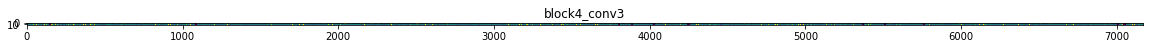

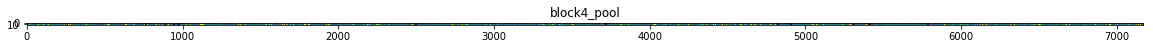

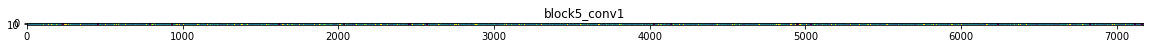

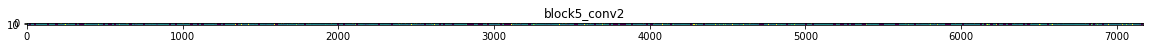

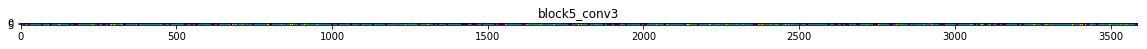

In [9]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(base_model.input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(ate_dir, f) for f in ate_fnames]
dog_img_files = [os.path.join(car_dir, f) for f in car_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=target_size)  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    pyplot.figure(figsize=(scale * n_features, scale))
    pyplot.title(layer_name)
    pyplot.grid(False)
    pyplot.imshow(display_grid, aspect='auto', cmap='viridis')

In [10]:
for layer in model.layers[:11]:
   layer.trainable = False
for layer in model.layers[11:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
#metrics= ['categorical_accuracy']
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history3=model.fit_generator(    
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    class_weight = 'balanced',
    epochs = epochs3)

Epoch 1/10
2142/2142 [==============================] - 628s 293ms/step - loss: 0.3777 - categorical_accuracy: 0.8708 - val_loss: 2.2252 - val_categorical_accuracy: 0.6141
Epoch 2/10
2142/2142 [==============================] - 625s 292ms/step - loss: 0.3371 - categorical_accuracy: 0.8877 - val_loss: 2.1822 - val_categorical_accuracy: 0.5915
Epoch 3/10
2142/2142 [==============================] - 626s 292ms/step - loss: 0.3075 - categorical_accuracy: 0.8963 - val_loss: 2.3688 - val_categorical_accuracy: 0.6067
Epoch 4/10
2142/2142 [==============================] - 626s 292ms/step - loss: 0.2677 - categorical_accuracy: 0.9104 - val_loss: 2.4835 - val_categorical_accuracy: 0.5800
Epoch 5/10
2142/2142 [==============================] - 627s 293ms/step - loss: 0.2486 - categorical_accuracy: 0.9170 - val_loss: 2.4752 - val_categorical_accuracy: 0.5866
Epoch 6/10
2142/2142 [==============================] - 627s 293ms/step - loss: 0.2237 - categorical_accuracy: 0.9250 - val_loss: 2.6382 - v

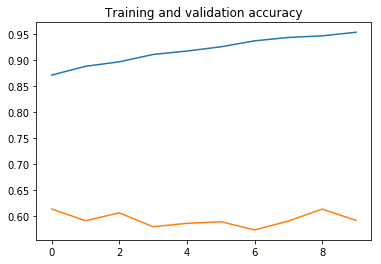

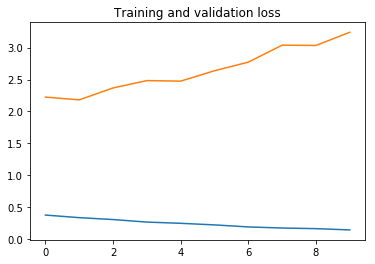

In [12]:
from matplotlib import pyplot

pyplot.plot(history3.history['categorical_accuracy'])
pyplot.plot(history3.history['val_categorical_accuracy'])
pyplot.title('Training and validation accuracy')
pyplot.show()

pyplot.plot(history3.history['loss'])
pyplot.plot(history3.history['val_loss'])
pyplot.title('Training and validation loss')
pyplot.show()

In [13]:
#Confution Matrix and Classification Report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(validation_generator, validation_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=labels))

Confusion Matrix
[[  20    6    3    0   20    2    3    0   14    0  326    3    3    0
     3]
 [   3    0    1    0    4    1    1    0    0    0   81    0    0    0
     1]
 [   8    1    0    0    4    0    2    0    2    0  106    1    0    0
     2]
 [   2    0    2    0    0    0    0    0    2    1   55    0    0    0
     0]
 [  26    1    3    0   19    1    1    0   14    0  288    2    2    0
     3]
 [   5    0    0    1    5    0    0    0    2    0   76    1    0    0
     2]
 [   6    1    1    0    2    0    0    0    2    0   59    0    1    0
     1]
 [   2    0    0    0    0    0    0    0    0    0    7    0    1    0
     0]
 [  71    6    9    1   22    3    8    0   30    3  750   11    4    0
    10]
 [  16    3    1    0   10    0    0    0    5    0  171    2    0    0
     0]
 [ 316   33   42    6  187   23   28    0  153   15 4682   39   26    2
    48]
 [  10    4    3    0   12    0    2    0    2    0  211    4    0    0
     6]
 [   6    0    0    0  

In [14]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history1.history['categorical_accuracy']
val_acc = history1.history['val_categorical_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history1.history['loss']
val_loss = history1.history['val_loss']

print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.648546918767507, 0.6532815828691981, 0.6531064872953282, 0.6533107654560011, 0.6533399480515012, 0.6534274958380013, 0.6535734088233289, 0.6531064872961979, 0.6530773047024373, 0.6530481221051978, 0.6532232176712404, 0.6535150436331986, 0.652902209129437, 0.6540695129407417, 0.6528146613411975]
[0.6538551401869159, 0.6538371548900328, 0.6538371548900328, 0.6543051006083295, 0.6540711277491811, 0.6534861956013103, 0.6541881141787552, 0.6546560598970519, 0.6527842770238652, 0.6548900327562003, 0.6525503041647169, 0.655357978474497, 0.6527842770238652, 0.6541881141787552, 0.6532522227421619]
[1.482831619798191, 1.4160801749256289, 1.4011477724373884, 1.3851526393831102, 1.3739765887362436, 1.3604751638414758, 1.355335798944567, 1.3476974922117502, 1.3423207984951813, 1.3327917642970768, 1.3295703393036697, 1.3223342171875037, 1.3179958740761155, 1.311237103382373, 1.3087530731093802]
[1.364992583187941, 1.365026718776919, 1.3556202957437147, 1.3664332025509658, 1.3481088675345894, 1.38

In [15]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history2.history['categorical_accuracy']
val_acc = history2.history['val_categorical_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']

print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.653544226230438, 0.6536317740151987, 0.653894417366002, 0.6549741734082007, 0.6541278781378297, 0.6567251291382034, 0.6582134415078359, 0.6607815099040123, 0.6633495783167133, 0.6656841859558471, 0.6681938891731993, 0.6751685294959704, 0.6819680742457412, 0.6878921411322501, 0.6978142236040044, 0.7066273674363205, 0.7207517436670388, 0.7347885720938627, 0.7526775031353896, 0.7711500860956144, 0.7850993667463747, 0.8006245075419616, 0.8233285668409955, 0.8394373595674562, 0.8538827443295414]
[0.6548900327562003, 0.6536031820308844, 0.6552409920449228, 0.6531352363125877, 0.6500935891436593, 0.6524333177351427, 0.6513804398689752, 0.6479878334113243, 0.6448291998128217, 0.6401497426298549, 0.6485727655591952, 0.6410856340664483, 0.6451801591015442, 0.6341834347215723, 0.619443144595227, 0.6234206832007487, 0.6328965839962565, 0.622250818905007, 0.6300889096864764, 0.6118390266729059, 0.6186242395882078, 0.6127749181094992, 0.6004913430042115, 0.5814225549836219, 0.5973327094057089]
[1

In [16]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history3.history['categorical_accuracy']
val_acc = history3.history['val_categorical_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history3.history['loss']
val_loss = history3.history['val_loss']

print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.8708086497265245, 0.8876761899203315, 0.8962850555928444, 0.9103802492193656, 0.9169755158110725, 0.9250299121673452, 0.9364986722006018, 0.9430063909971116, 0.9460997461096797, 0.9530160212536266]
[0.6140617688348151, 0.5914833879270005, 0.6066916237716425, 0.5800187178287318, 0.5865699578848853, 0.589728591483388, 0.573935423490875, 0.5908984557791296, 0.6138277959756668, 0.5923022929340197]
[0.37757704201399206, 0.3371276750460071, 0.30749238065123524, 0.26768899122693623, 0.24858528320399081, 0.22359505889373438, 0.1918596677817727, 0.17490624499378124, 0.16491521974336235, 0.14506741589321312]
[2.2252397025696964, 2.1821896113912023, 2.3687993834439314, 2.483522368574957, 2.475200377115313, 2.63819567873816, 2.7729289160608186, 3.0387007575421117, 3.034177263986858, 3.2409449993699413]
